This dataset consists of a few million Amazon customer reviews (Text) and star ratings (Score) for learning how to train Reviews.csv for sentiment analysis.
The idea here is a dataset is more than a toy - real business data on a reasonable scale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
data = pd.read_csv('Reviews.csv')

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

### Sampling the data

In [5]:
data = data.sample(frac= 0.20,replace = True).reset_index(drop = True)

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,469621,B000E179HC,A23TD9608Z5U85,G. Dawson,13,17,1,1180656000,Not what I thought,"I thought I was getting K-cups. Instead, I rec..."
1,430560,B0070SGNS8,A1RQ27ZG9AD7ST,Aaron,1,1,5,1329350400,Perfection,Arguably the most well-rounded hot sauce on th...
2,85808,B004OYMR4K,A2JRPYRVVFFESS,nafrotiti,0,0,5,1311897600,"Natural, Organic Mint Mango Hard Candy",A great flavorful hard candy that provides all...
3,17597,B000U9YQ56,A1JHXIJJ773BZR,GeekyErin,6,6,5,1266192000,"Aromatic, delicious, and delightful.","This extract is excellent, and it shipped real..."
4,505948,B001ELL512,A34SPFZIHHN907,Linda R. Belair,0,0,5,1309564800,Consistent good flavor! My favorite!,I buy this and a Kona blend for my brewer. I h...


In [6]:
data.shape

(113691, 10)

* We are using 113691 data outoff 568454

In [7]:
data.drop(columns ='Id',axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               113691 non-null  object
 1   UserId                  113691 non-null  object
 2   ProfileName             113688 non-null  object
 3   HelpfulnessNumerator    113691 non-null  int64 
 4   HelpfulnessDenominator  113691 non-null  int64 
 5   Score                   113691 non-null  int64 
 6   Time                    113691 non-null  int64 
 7   Summary                 113685 non-null  object
 8   Text                    113691 non-null  object
dtypes: int64(4), object(5)
memory usage: 7.8+ MB


In [9]:
data.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,113691.000000,113691.000000,113691.000000,1.136910e+05
mean,1.741853,2.230344,4.178572,1.296334e+09
std,7.348022,7.939204,1.314294,4.796679e+07
min,0.000000,0.000000,1.000000,9.473760e+08
25%,0.000000,0.000000,4.000000,1.271549e+09
50%,0.000000,1.000000,5.000000,1.311206e+09
75%,2.000000,2.000000,5.000000,1.332547e+09
max,559.000000,562.000000,5.000000,1.351210e+09


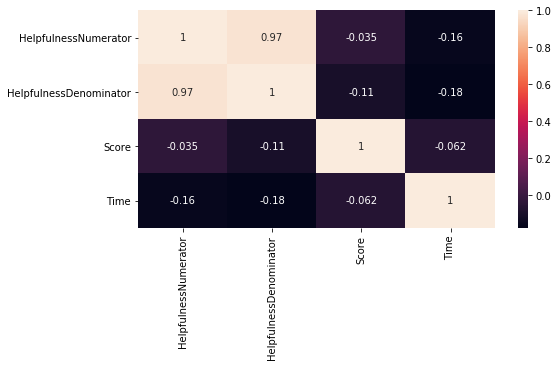

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),annot=True)

In [11]:
data.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   6
Text                      0
dtype: int64

##### * We have only 16 datapoints are missing in "ProfileName" and 27 datapoints are missing in "Summary" 
##### * We have a huge data and we can delete those null datapoints 

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [14]:
data['Score'].value_counts()

5    72492
4    16123
1    10543
3     8499
2     6025
Name: Score, dtype: int64

Text(0.5, 1.0, 'Scores plot')

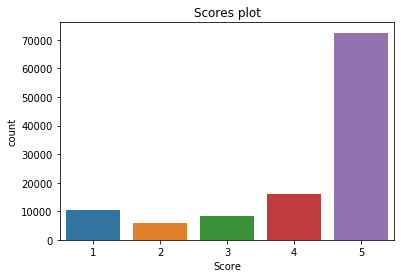

In [15]:
sns.countplot(data['Score'])
plt.title('Scores plot')

* So score of 5,4 and 1  have a high counts, than 2 and 3 
* We can say that most of the coustomers are rating the either 5 i.e high or 1 i.e low and 4,3 and 2 for just compromising on a product 

In [16]:
# Percentage of Rating 

rating_per = data['Score'].value_counts()/len(data)*100
rating_per

5    63.767351
4    14.182544
1     9.274116
3     7.476118
2     5.299872
Name: Score, dtype: float64

* Outoff 100, 63.69% of coustomers are rated a product high i.e 5
* And 14.18% of coustomers are rating 4
* 9.13 are rated low i.e 1

Text(0.5, 1.0, 'Percentage of rating ')

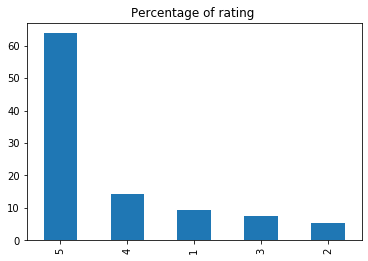

In [17]:
rating_per.plot.bar()
plt.title('Percentage of rating ')

#### Data Precessing and Transformation

In [18]:
data = pd.DataFrame(data,columns=['Score','Text'])
data.rename(columns={'Score':'Rating', 'Text':'Review'},inplace=True)

* We are using "Score" and "Text" features for prediction

In [19]:
data.head()

,Rating,Review
0,1,"I thought I was getting K-cups. Instead, I rec..."
1,5,Arguably the most well-rounded hot sauce on th...
2,5,A great flavorful hard candy that provides all...
3,5,"This extract is excellent, and it shipped real..."
4,5,I buy this and a Kona blend for my brewer. I h...


In [20]:
def sentiment(Rating):
    if (Rating <=2):
        return 0
    else:
        return 1

#### * We are considering the rating which are below 2 are negative sentiment and abow are positive sentiment

In [21]:
data['Sentiment'] = data['Rating'].apply(sentiment)

In [22]:
data.head()

,Rating,Review,Sentiment
0,1,"I thought I was getting K-cups. Instead, I rec...",0
1,5,Arguably the most well-rounded hot sauce on th...,1
2,5,A great flavorful hard candy that provides all...,1
3,5,"This extract is excellent, and it shipped real...",1
4,5,I buy this and a Kona blend for my brewer. I h...,1


In [23]:
data['Sentiment'].value_counts()

1    97114
0    16568
Name: Sentiment, dtype: int64

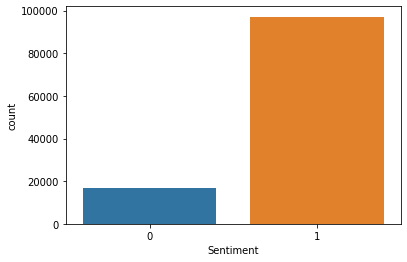

In [24]:
sns.countplot(data['Sentiment'])

##### * We have a unbalanced data here so we sholud resolve this before feeding to the model
* We can do that by changing the 'rating' threshold in 'sentiment' defined function or 
* By using Undersampling and oversampling 

#### Text processing

In [25]:
def clean(Review):
    
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [26]:
data['Review'] = data['Review'].apply(clean)

In [27]:
data['Review'].head()

0    i thought i was getting kcups instead i receiv...
1    arguably the most wellrounded hot sauce on the...
2    a great flavorful hard candy that provides all...
3    this extract is excellent and it shipped reall...
4    i buy this and a kona blend for my brewer i ha...
Name: Review, dtype: object

In [37]:
data

,Rating,Review,Sentiment
0,1,i thought i was getting kcups instead i receiv...,0
1,5,arguably the most wellrounded hot sauce on the...,1
2,5,a great flavorful hard candy that provides all...,1
3,5,this extract is excellent and it shipped reall...,1
4,5,i buy this and a kona blend for my brewer i ha...,1
...,...,...,...
113686,2,ughi tried this as a replacement for the cocon...,0
113687,5,you get a lot of flavor for calories with the...,1
113688,5,rich tea are the quintessential english teatim...,1
113689,5,my wife made me buy a case of this tea as soon...,1


### Spliting Traing and Testing data

In [38]:
x = data['Review'].values
y = data['Sentiment']

In [39]:
print (x)

['i thought i was getting kcups instead i received packets of hot chocolate i could have bought that at any local grocery store'
 'arguably the most wellrounded hot sauce on the market perfect balance of heat flavor and versatility plus the squeeze bottle is great'
 'a great flavorful hard candy that provides all natural ingredients that helps curb hunger while keeping your breath fresh and your mouth moist just delicious as a treat'
 ...
 'rich tea are the quintessential english teatime biscuit to be served midafternoon with a fine cup of  taken with milk not lemon and mcvitie make the finest rich tea having exactly the correct texture and firmness and delicate flavour which these biscuits should have rich tea are also the ultimate dunking biscuits for which purposes they must of course be entirely whole and not cracked even in the slightest otherwise they will instantly fall in half and disappear to the bottom of the cup even whole these biscuits present the maximum challenge to the 

In [67]:
x.shape

(113682, 111792)

In [64]:
y.shape

(113682,)

### Converting Text data into numerical data

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
vector = TfidfVectorizer()
vector.fit(x)

TfidfVectorizer()

In [42]:
x = vector.transform(x)

In [43]:
print (x)

  (0, 107008)	0.13052291182133455
  (0, 99570)	0.2482636801918074
  (0, 98056)	0.11552992059889167
  (0, 92872)	0.22255802812244876
  (0, 79570)	0.27281840896846643
  (0, 70360)	0.3421285443428494
  (0, 66899)	0.09236809040992008
  (0, 56120)	0.2483935396675289
  (0, 52541)	0.30536461251910413
  (0, 49644)	0.27700969221896754
  (0, 46952)	0.24492562719784106
  (0, 44689)	0.11769931919996128
  (0, 43023)	0.2658752365152255
  (0, 40554)	0.26548227032802085
  (0, 22239)	0.22116216312412446
  (0, 17378)	0.23564105394728574
  (0, 11009)	0.21402834323543038
  (0, 5626)	0.148508469340103
  (0, 4087)	0.19859568087720145
  (1, 108194)	0.3933524519772126
  (1, 105826)	0.3963833925261341
  (1, 98212)	0.151153178523168
  (1, 91510)	0.28183647315989885
  (1, 84344)	0.20165573956465377
  (1, 73957)	0.20443778612877522
  :	:
  (113681, 36501)	0.05894390042210222
  (113681, 35785)	0.15668108339059064
  (113681, 35496)	0.08418629522097622
  (113681, 34828)	0.20712028128460488
  (113681, 32955)	0.083481

###### * Befor splitting the data we have to balance the class labels 
###### * We are doing undersampling of the data for the better prediction

In [44]:
data['Sentiment'].value_counts()

1    97114
0    16568
Name: Sentiment, dtype: int64

* Here the class 1 have 97114 data and class 0 have 16568 data so we have to undersample the class 1 data 

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
under_sample = RandomUnderSampler(random_state=42)
X,Y = under_sample.fit_resample(x,y)

In [68]:
X.shape

(33136, 111792)

In [69]:
Y.shape

(33136,)

In [70]:
Y.value_counts()

1    16568
0    16568
Name: Sentiment, dtype: int64

* We are undr sampled the target valiable 'Sentiment' and we got equal number data for class 1 and 0

#### Splitting the data for training and testing data

In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25,random_state=42)

### Buliding the model

In [73]:
from sklearn.naive_bayes import MultinomialNB

Naive = MultinomialNB()

In [74]:
Naive.fit(x_train,y_train)

MultinomialNB()

In [75]:
y_predict = Naive.predict(x_test)

In [76]:
y_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [78]:
print('Training accuracy:', Naive.score(x_train,y_train))
print('Test accuracy:', Naive.score(x_test,y_test))

Training accuracy: 0.9059633027522935
Test accuracy: 0.8492274263640753


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict))

print(confusion_matrix(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4163
           1       0.86      0.83      0.85      4121

    accuracy                           0.85      8284
   macro avg       0.85      0.85      0.85      8284
weighted avg       0.85      0.85      0.85      8284

[[3614  549]
 [ 700 3421]]
